# Mid Bootcamp Project 😵‍💫

**Housing Regret-ssion - EDA and Modeling**

--------

**Objective:** Explore housing trends and develop a model to predict housing prices
* Students’ names: **Yamila Rodriguez Teran** + **Simon Stewart**
* IrronHack mid-bootcamp project: part time
* Project review date/time: 19/11/21
* Instructors: **Sian Davies**  +  **Ángela Sánchez** (TA)

## Set up

In [1]:
# importing the necesary packages
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor


In [2]:
# opening the file
df = pd.read_excel('regression_data.xls')

In [3]:
# getting information from the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [4]:
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


## EDA

### A quick data check & cleanup

We saw that we have no nulls so we will look at all our numeric data to get an overall idea

In [5]:
# describing numericals
df.describe(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


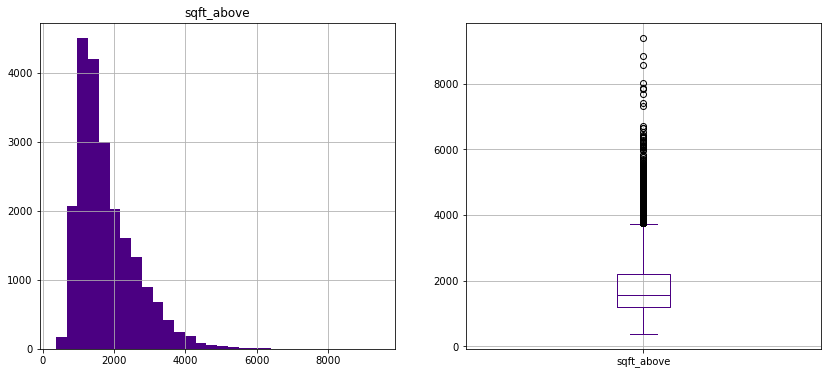

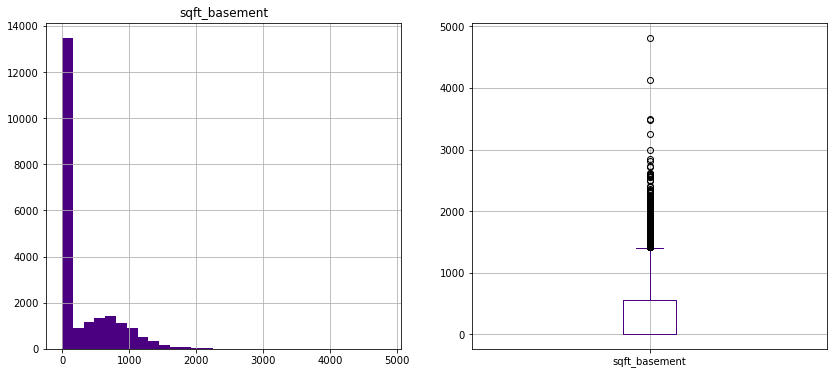

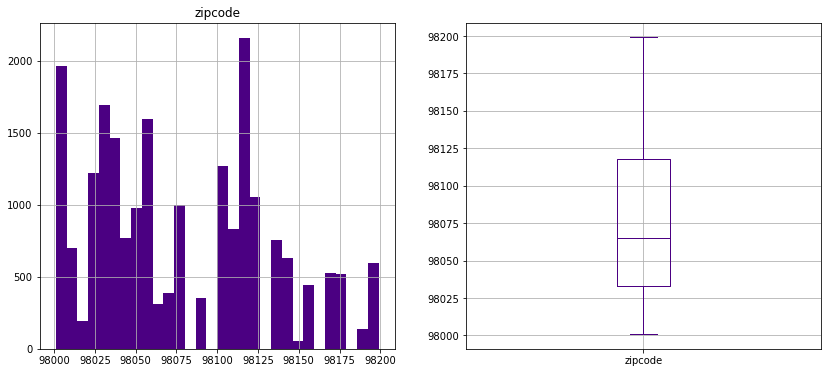

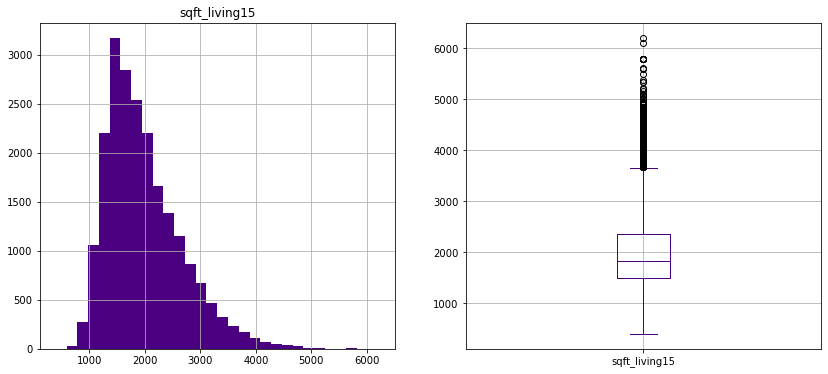

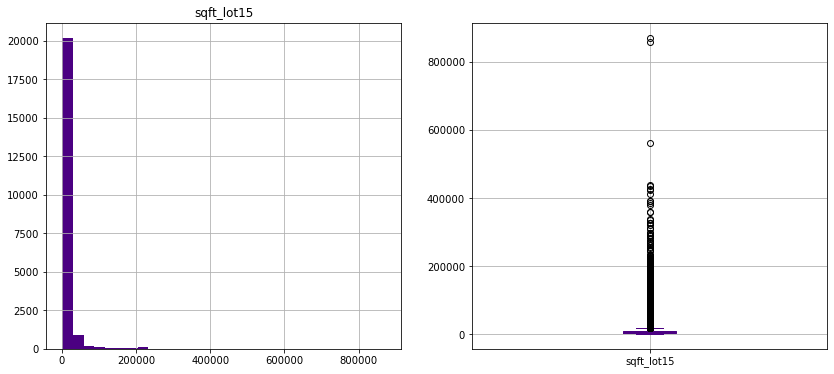

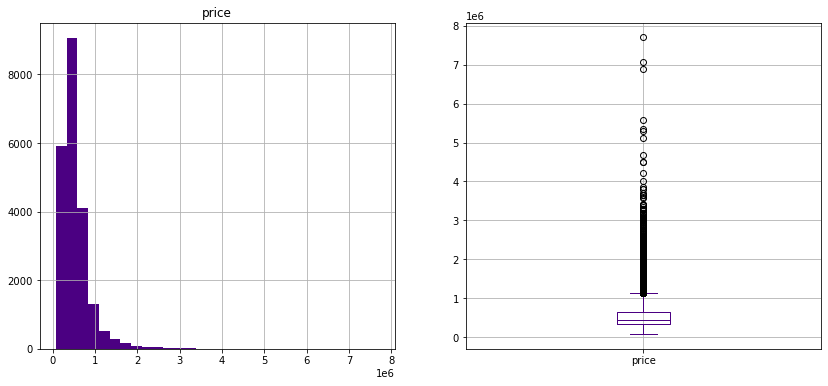

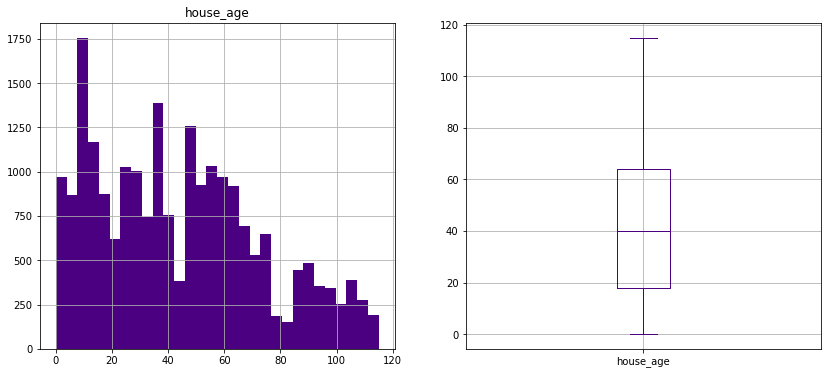

In [430]:
# plotting numericals
numdf = df.select_dtypes(include = np.number)
for column in numdf.columns:
    # 2 charts
    f, axes = plt.subplots(1, 2, figsize=(14, 6))
    # histogram
    numdf[column].hist(bins = 30, ax = axes[0], color = 'indigo')
    axes[0].set_title(column)
    # boxplot 
    numdf.boxplot(column = column, ax = axes[1], color = 'indigo')
    plt.show()

#### ID

We will now check some of the columns to seek for 'weird' numbers

In [7]:
# checking id
df.id.value_counts()

795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: id, Length: 21420, dtype: int64

In [8]:
# we have some duplicated ID's, checking one for reference
df.loc[df['id'] == 795000620]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
17588,795000620,2014-09-24,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,115000
17589,795000620,2014-12-15,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,124000
17590,795000620,2015-03-11,3,1.0,1080,6250,1.0,0,0,2,...,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,157000


 Apparently in the duplicated ID's the price changes with the date so we are keeping it for better accuracy of the model but we are dropping the column anyway

In [9]:
df.drop(['id'], axis = 1, inplace = True) 

#### Bedrooms

In [10]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
# 33 bedrooms? might be an error
# check the row
df.loc[df['bedrooms'] == 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


Since we are not sure if it's a typo and leaving it will make a big difference on our data we decided to drop it

In [12]:
df.drop(df.index[15856])

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


#### Bathrooms

In [13]:
df.bathrooms.value_counts()

2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

#### Floors

In [14]:
df.floors.value_counts()

1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

#### Waterfront

In [15]:
df.waterfront.value_counts()

0    21434
1      163
Name: waterfront, dtype: int64

#### SQFT Living & SQFT Living 15

In [16]:
df.sqft_living.value_counts()

1300    138
1400    135
1440    133
1800    129
1660    129
       ... 
2507      1
9890      1
5584      1
1961      1
1425      1
Name: sqft_living, Length: 1034, dtype: int64

In [17]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    192
1500    180
1460    169
       ... 
3736      1
4950      1
2728      1
4740      1
2927      1
Name: sqft_living15, Length: 777, dtype: int64

For better accuracy and less data we decided to drop `sqft_living` & `sqft_lot`, giving that we have updated sizes on another column (`sqft_living15` & `sqft_lot15`)

In [18]:
df.drop(['sqft_living', 'sqft_lot'], axis = 1, inplace = True) 

In [19]:
# reindexing
df.reset_index(drop=True, inplace=True)

In [20]:
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


#### Years Built & Renovated

In [21]:
df.yr_renovated.value_counts()

0       20683
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

We won't be able to work with the zeroes in the `yr_renovated` and they are a majority so we decided to drop it

In [22]:
df.drop(['yr_renovated'], axis = 1, inplace = True)

The year built is actually a date, we decided to turn it into a regular number by obtaining the age of the house (based on 2015 as end date)

In [23]:
# creating new age column
dfnew = pd.DataFrame(2015 - df["yr_built"])
dfnew

,yr_built
0,60
1,64
2,82
3,50
4,28
...,...
21592,6
21593,1
21594,6
21595,11


In [24]:
# renaming column in new dataframe
dfnew.rename(columns={'yr_built': 'house_age'}, inplace=True) 
# joining dataframes
df = pd.concat([df, dfnew], axis=1)
df.head()

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_age
0,2014-10-13,3,1.00,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,221900,60
1,2014-12-09,3,2.25,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,538000,64
2,2015-02-25,2,1.00,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,180000,82
3,2014-12-09,4,3.00,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,604000,50
4,2015-02-18,3,2.00,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,510000,28


In [25]:
# droping the column
df.drop(['yr_built'], axis = 1, inplace = True) 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   floors         21597 non-null  float64       
 4   waterfront     21597 non-null  int64         
 5   view           21597 non-null  int64         
 6   condition      21597 non-null  int64         
 7   grade          21597 non-null  int64         
 8   sqft_above     21597 non-null  int64         
 9   sqft_basement  21597 non-null  int64         
 10  zipcode        21597 non-null  int64         
 11  lat            21597 non-null  float64       
 12  long           21597 non-null  float64       
 13  sqft_living15  21597 non-null  int64         
 14  sqft_lot15     21597 non-null  int64         
 15  price          2159

#### LAT, LONG, ZIPCODE

Too many columns for the same information, we will drop `lat` and `long` and keep `zipcode`.

In [27]:
df = df.drop(['lat', 'long'], axis=1)

#### DATE

We don't consider it really necessary for our predictions and turning it into numbers doesn't seem really useful, so we are dropping the column

In [28]:
df.drop(['date'], axis = 1, inplace = True) 

In [29]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Grade

In [30]:
df.grade.value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

According to google, the grade 1-3:  'Falls short of minimum building standards. Normally cabin or inferior structure.'


In [31]:
# checking and removing the grade
df.loc[df['grade'] == 3]

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age
3220,1,0.75,1.0,0,0,5,3,520,0,98022,1340,12233,262000,95


In [32]:
df.drop(df.index[3220])

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,price,house_age
0,3,1.00,1.0,0,0,3,7,1180,0,98178,1340,5650,221900,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,538000,64
2,2,1.00,1.0,0,0,3,6,770,0,98028,2720,8062,180000,82
3,4,3.00,1.0,0,0,5,7,1050,910,98136,1360,5000,604000,50
4,3,2.00,1.0,0,0,3,8,1680,0,98074,1800,7503,510000,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,3.0,0,0,3,8,1530,0,98103,1530,1509,360000,6
21593,4,2.50,2.0,0,0,3,8,2310,0,98146,1830,7200,400000,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,1020,2007,402101,6
21595,3,2.50,2.0,0,0,3,8,1600,0,98027,1410,1287,400000,11


In [33]:
# reindexing
df.reset_index(drop=True, inplace=True)

#### Categorical columns

We decided to turn some columns into categoricals to be able to manage them differently from the rest of the data `bedrooms`, `bathrooms`, `floors`, `waterfront`, `view`, `condition` and `grade`. 

In [34]:
originaldf = df.copy()

In [35]:
# changing the selected columns to object type
df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 
    'condition', 'grade']] = df[['bedrooms', 'bathrooms', 'floors', 
                                 'waterfront', 'view', 'condition', 'grade']].astype(object)

In [36]:
# checking that the type change is done
df.dtypes

bedrooms         object
bathrooms        object
floors           object
waterfront       object
view             object
condition        object
grade            object
sqft_above        int64
sqft_basement     int64
zipcode           int64
sqft_living15     int64
sqft_lot15        int64
price             int64
house_age         int64
dtype: object

## Correlations

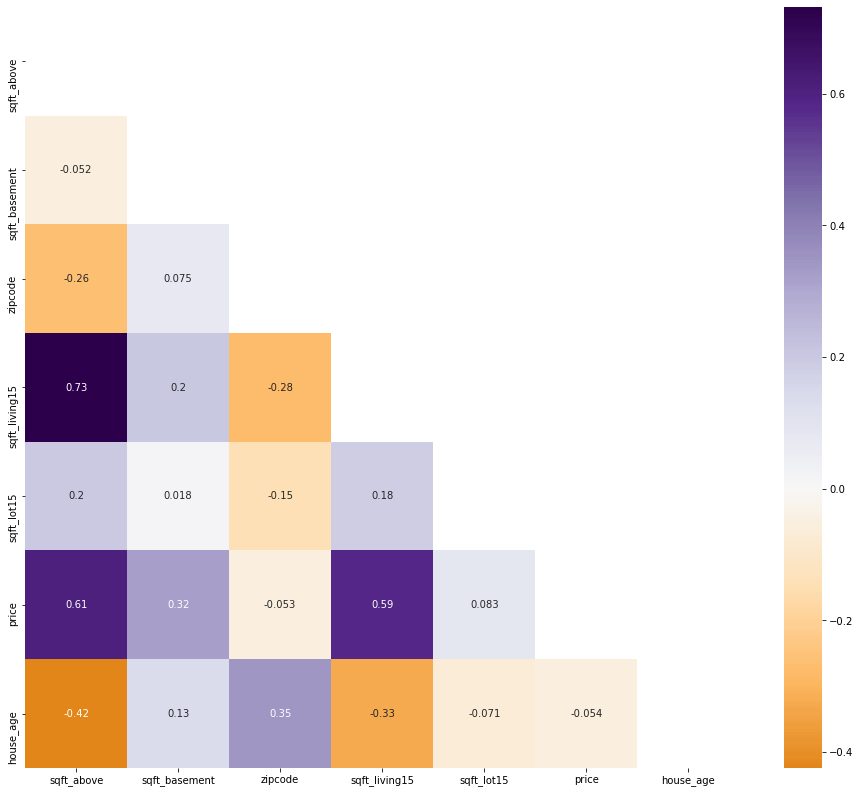

In [37]:
# checking correlations
corr_matrix = df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(df.corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

High correlations between features: first model might not be as accurate, maybe drop some features in the next try but for now we will use them all

#### Quick scatter check of columns for future comparison

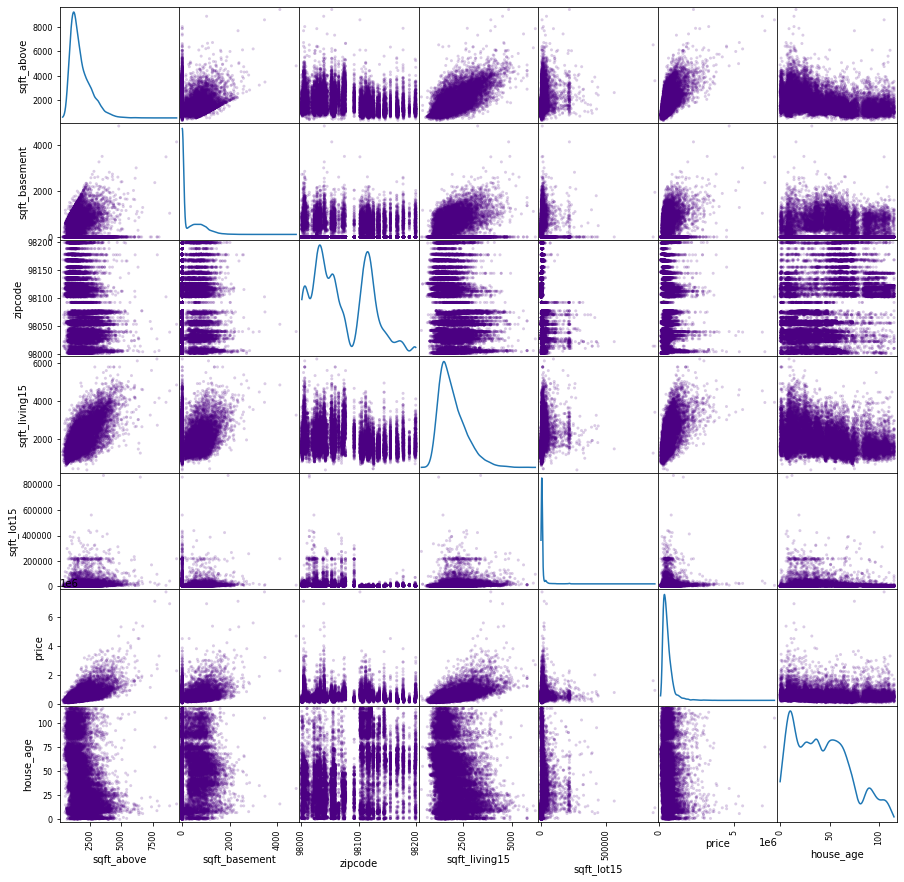

In [431]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(15,15), diagonal="kde", color='indigo');

In [39]:
#copying and saving the cleaned dataframe to be able to use it later
cleaneddf = df.copy()
df.to_csv("cleaned_regression_data.csv", index=False)

## Modelling

In [40]:
# getting the packages
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np

### First Try: without data processing. Linear regression, KNN & Decision Tree

#### Defining X & y

In [41]:
X = cleaneddf.drop(columns=['price'])

In [42]:
X

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age
0,3,1.0,1.0,0,0,3,7,1180,0,98178,1340,5650,60
1,3,2.25,2.0,0,0,3,7,2170,400,98125,1690,7639,64
2,2,1.0,1.0,0,0,3,6,770,0,98028,2720,8062,82
3,4,3.0,1.0,0,0,5,7,1050,910,98136,1360,5000,50
4,3,2.0,1.0,0,0,3,8,1680,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.5,3.0,0,0,3,8,1530,0,98103,1530,1509,6
21593,4,2.5,2.0,0,0,3,8,2310,0,98146,1830,7200,1
21594,2,0.75,2.0,0,0,3,7,1020,0,98144,1020,2007,6
21595,3,2.5,2.0,0,0,3,8,1600,0,98027,1410,1287,11


In [43]:
y = cleaneddf['price']

In [44]:
X.shape

(21597, 13)

In [45]:
y.shape

(21597,)

#### Split data intro train & test

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [47]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)
print('Linear Regression on Raw Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Linear Regression on Raw Data
Accuracy R2:  0.6562731494899455
Mean Absolute Error MAE:  139494.2294784057
Mean Square Error MSE:  46887051959.96079
Root Mean Square Error RMSE:  216534.1819666373


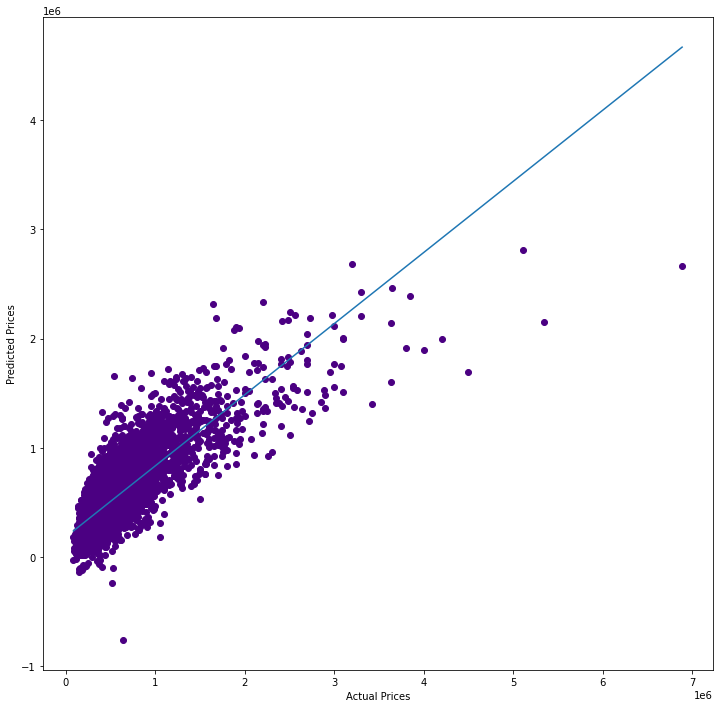

In [48]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="indigo")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

First approach: with poorly cleaned data and no preprocessing we managed an accuracy of 65% and a mean absolute error of $139.494, we will try to improve the accuracy now by processing the data and maybe do some more cleaning and trying different models

#### KNN

In [49]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)
print('KNN on Raw Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

KNN on Raw Data
Accuracy R2:  0.5453558319878258
Mean Absolute Error MAE:  150048.65207199904
Mean Square Error MSE:  62017048412.85423
Root Mean Square Error RMSE:  249032.2236435563


KNN is not the fittest model so far, linear regression is more accurate

#### Decision Tree

In [50]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)
print('Decision Tree on Raw Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Decision Tree on Raw Data
Accuracy R2:  0.631692535728551
Mean Absolute Error MAE:  126044.87463826832
Mean Square Error MSE:  50240041442.53401
Root Mean Square Error RMSE:  224142.90406464803


Decision tree performs better than KNN but worse than Linear

#### Random Forest

In [51]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print('Random Forest on Raw Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Random Forest on Raw Data
Accuracy R2:  0.8017375959765979
Mean Absolute Error MAE:  89093.60785001845
Mean Square Error MSE:  27044554783.42119
Root Mean Square Error RMSE:  164452.28725506127


Random Forest has the highest accuracy  at 80% with the raw data, giving us a mean absolute error of $89.018 but, as we could see, the desicion trees are not good fits.

### Second Try: StandardScaler & GetDummies. Linear regression, KNN & Decision Tree

#### StandardScaler

In [52]:
# getting the numerical columns
numericals = df._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [53]:
from sklearn.preprocessing import StandardScaler
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.73525069, -0.65903091,  1.86964543, -0.94367562, -0.26062671,
         0.54467809],
       [ 0.46077619,  0.24460216,  0.87921029, -0.43288674, -0.18769961,
         0.68085037],
       [-1.23057495, -0.65903091, -0.93347288,  1.07029196, -0.17219022,
         1.29362563],
       ...,
       [-0.92854796, -0.65903091,  1.23427195, -1.41068259, -0.39419807,
        -1.29364769],
       [-0.22784535, -0.65903091, -0.95216033, -0.84151784, -0.42059702,
        -1.12343234],
       [-0.92854796, -0.65903091,  1.23427195, -1.41068259, -0.41803046,
        -1.25960462]])

#### GetDummies

In [54]:
# using categorical columns
Xcat = df.select_dtypes(include = object)

In [55]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [56]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [57]:
y = df['price']

In [58]:
X.shape

(21597, 69)

In [59]:
y.shape

(21597,)

#### Split data intro train and test


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear Regression

In [61]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)
print('Linear Regression on Processed Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Linear Regression on Processed Data
Accuracy R2:  0.6948622519524283
Mean Absolute Error MAE:  132342.2925235878
Mean Square Error MSE:  41623194191.614136
Root Mean Square Error RMSE:  204017.63206059946


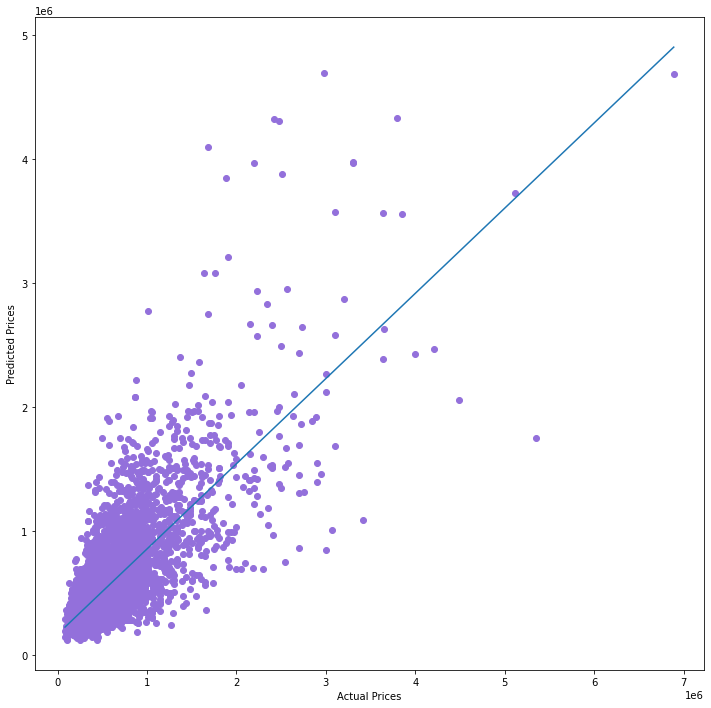

In [442]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="mediumpurple")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

We didn't get much of a difference but still we managed to improve the model a little by getting now a 69% accuracy and a mean error of $132,342, we are getting there.

#### KNN

In [63]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)
print('KNN on Processed Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

KNN on Processed Data
Accuracy R2:  0.6490883936034404
Mean Absolute Error MAE:  124945.24343095266
Mean Square Error MSE:  47867109299.29963
Root Mean Square Error RMSE:  218785.53265538294


Our KNN model is worst than the linear one but it has improved from the previous run that gave us a 54%

#### Decision Tree

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)
print('Decision Tree on Processed Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Decision Tree on Processed Data
Accuracy R2:  0.5651733172670579
Mean Absolute Error MAE:  132858.92232897325
Mean Square Error MSE:  59313787202.319466
Root Mean Square Error RMSE:  243544.22021949006


Decision tree has gotten a bit worse

#### Random Forest

In [65]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print('Random Forest on Processed Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Random Forest on Processed Data
Accuracy R2:  0.7849617836615062
Mean Absolute Error MAE:  93661.52243488739
Mean Square Error MSE:  29332907824.567295
Root Mean Square Error RMSE:  171268.52549306102


And of course Random forest has also decreased it's accuracy, we will try some more changes

### Third Try: without outliers. Linear regression, KNN & Decision Tree

With the aim of trying to get a more accurate prediction we decided to drop outliers

In [66]:
# found this nice little code with the help of our friend google
def get_outliers(originaldf, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = originaldf[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = originaldf[(originaldf[col] > mean + 3*sd) | (originaldf[col]  < mean  - 3*sd)].index
        # and add those values to our list
        outlier_idxs  += [x for x in outliers_mask]
    return list(set(outlier_idxs))

In [104]:
df_outliers = get_outliers(originaldf, originaldf)

In [105]:
df_outliers

[5,
 8201,
 10,
 15,
 16399,
 16404,
 21,
 8215,
 8217,
 16416,
 36,
 16424,
 41,
 16429,
 49,
 16434,
 8247,
 58,
 60,
 8259,
 70,
 8270,
 16474,
 98,
 114,
 8312,
 8318,
 16511,
 16510,
 8321,
 8322,
 16513,
 16516,
 8337,
 147,
 153,
 8355,
 16553,
 16556,
 16566,
 185,
 8379,
 16574,
 8402,
 216,
 16600,
 218,
 16610,
 230,
 238,
 239,
 8436,
 246,
 8438,
 8443,
 16635,
 264,
 269,
 270,
 8462,
 8467,
 16660,
 282,
 8478,
 294,
 300,
 8495,
 312,
 313,
 314,
 8507,
 16706,
 8514,
 16715,
 8527,
 8528,
 16722,
 8535,
 8537,
 350,
 8547,
 8549,
 8559,
 16759,
 380,
 16767,
 384,
 16768,
 8580,
 8588,
 397,
 16789,
 16790,
 409,
 411,
 416,
 8610,
 16803,
 419,
 8614,
 8615,
 16811,
 8620,
 8619,
 8629,
 16823,
 443,
 16830,
 450,
 16834,
 8646,
 457,
 8655,
 16848,
 465,
 8660,
 473,
 8671,
 16863,
 484,
 8683,
 16879,
 8698,
 512,
 16897,
 16900,
 518,
 519,
 527,
 532,
 16917,
 540,
 16928,
 16930,
 551,
 555,
 556,
 8748,
 561,
 8755,
 8756,
 16955,
 8763,
 575,
 577,
 582,
 8775,

In [106]:
newdf = originaldf.drop(df_outliers, axis = 0)

In [107]:
# reindexing
newdf.reset_index(drop=True, inplace=True)

In [108]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19736 entries, 0 to 19735
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       19736 non-null  int64  
 1   bathrooms      19736 non-null  float64
 2   floors         19736 non-null  float64
 3   waterfront     19736 non-null  int64  
 4   view           19736 non-null  int64  
 5   condition      19736 non-null  int64  
 6   grade          19736 non-null  int64  
 7   sqft_above     19736 non-null  int64  
 8   sqft_basement  19736 non-null  int64  
 9   zipcode        19736 non-null  int64  
 10  sqft_living15  19736 non-null  int64  
 11  sqft_lot15     19736 non-null  int64  
 12  price          19736 non-null  int64  
 13  house_age      19736 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.1 MB


In [109]:
# changing the selected columns to object type
newdf[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']] = newdf[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']].astype(object)

#### StandardScaler

In [110]:
# getting the numerical columns
numericals = newdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])

In [111]:
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.7314083 , -0.66098334,  1.86923127, -0.94696813, -0.38348353,
         0.5357764 ],
       [ 0.66536096,  0.36634968,  0.87327226, -0.3613401 , -0.17896593,
         0.67192675],
       [-1.3098683 , -0.66098334, -0.94952063,  1.36207951, -0.13547124,
         1.28460333],
       ...,
       [-0.95714879, -0.66098334,  1.23031417, -1.48239946, -0.75807258,
        -1.30225335],
       [-0.13883952, -0.66098334, -0.96831231, -0.82984252, -0.8321061 ,
        -1.13206541],
       [-0.95714879, -0.66098334,  1.23031417, -1.48239946, -0.82490839,
        -1.26821576]])

#### GetDummies

In [112]:
# using categorical columns
Xcat = newdf.select_dtypes(include = object)

In [113]:
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [114]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [115]:
y = newdf['price']

In [116]:
y.shape

(19736,)

In [117]:
X.shape

(19736, 41)

#### Splitting data

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [119]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)
print('Linear Regression on Data without Outliers')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Linear Regression on Data without Outliers
Accuracy R2:  0.596455827216015
Mean Absolute Error MAE:  111230.9625956594
Mean Square Error MSE:  22163376277.737366
Root Mean Square Error RMSE:  148873.6923628126


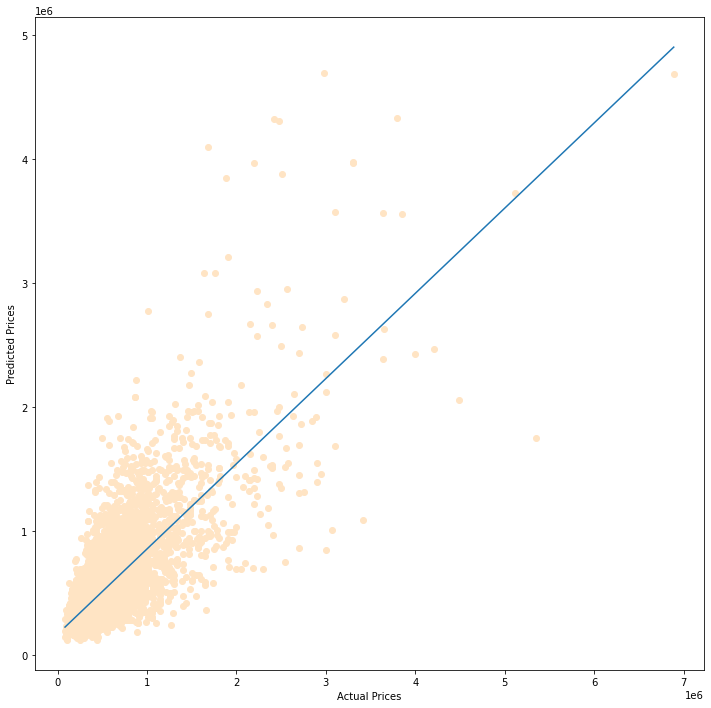

In [444]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="bisque")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

Even by dropping outliers our accuracy is lower than the original run, we will try cleaning highly correlated fields out of this new data

#### KNN

In [121]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)
print('KNN on Data without Outliers')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

KNN on Data without Outliers
Accuracy R2:  0.6148956684621889
Mean Absolute Error MAE:  104424.83414608402
Mean Square Error MSE:  21150626825.251873
Root Mean Square Error RMSE:  145432.55077613084


Our KNN in this case has a slightly better accuracy than the linear regression model, 61% against 59%

#### Decision Tree

In [123]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)
print('Decision Tree on Data without Outliers')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Decision Tree on Data without Outliers
Accuracy R2:  0.5182246612705774
Mean Absolute Error MAE:  107087.44825839139
Mean Square Error MSE:  26459973489.22275
Root Mean Square Error RMSE:  162665.2190519619


Decision tree just keeps getting worse, we can't seem to find the right data cleanup for it

#### Random Forest

In [124]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print('Random Forest on Data Without Outliers')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Random Forest on Data Without Outliers
Accuracy R2:  0.7713133894135723
Mean Absolute Error MAE:  75511.5983219327
Mean Square Error MSE:  12559882515.81201
Root Mean Square Error RMSE:  112070.88165893944


Random forest keeps decreasing aswell

### Fourth Try: less data, more accuracy?

We will do some try outs with only a few columns that we consider relevant to see if with less information we manage to get more accuracy. Since dropping outliers wasn't helpful we are going to use the clean dataset again with all the columns as numbers

In [125]:
originaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21597 non-null  int64  
 1   bathrooms      21597 non-null  float64
 2   floors         21597 non-null  float64
 3   waterfront     21597 non-null  int64  
 4   view           21597 non-null  int64  
 5   condition      21597 non-null  int64  
 6   grade          21597 non-null  int64  
 7   sqft_above     21597 non-null  int64  
 8   sqft_basement  21597 non-null  int64  
 9   zipcode        21597 non-null  int64  
 10  sqft_living15  21597 non-null  int64  
 11  sqft_lot15     21597 non-null  int64  
 12  price          21597 non-null  int64  
 13  house_age      21597 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 2.3 MB


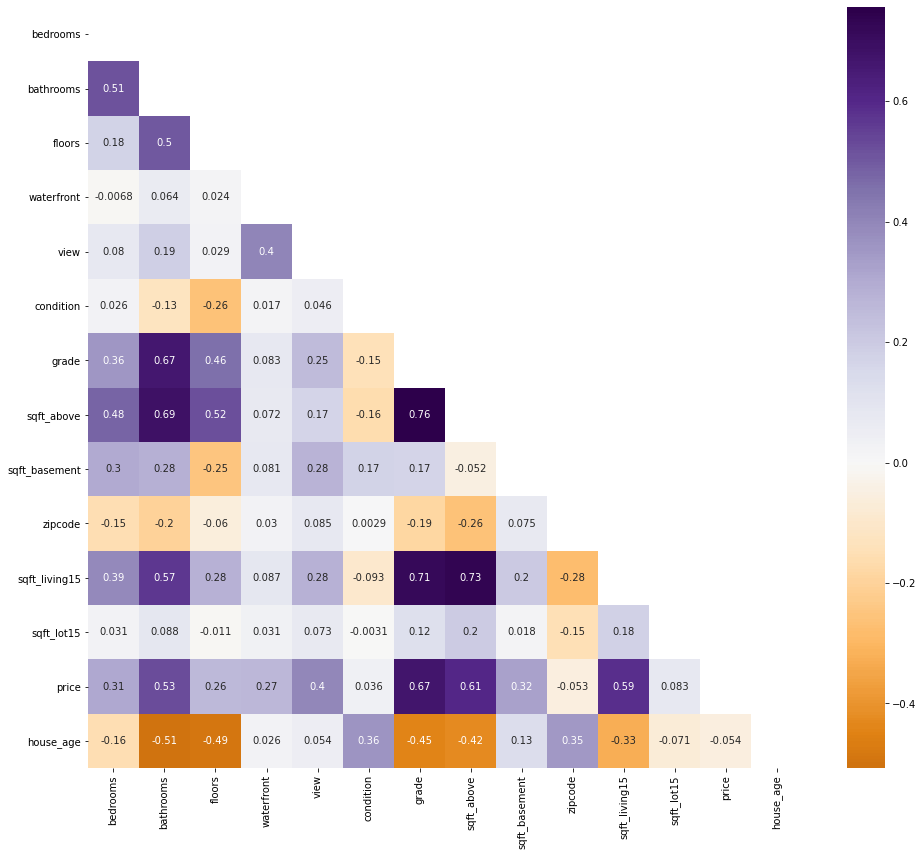

In [129]:
# checking correlations
corr_matrix = originaldf.corr()
mask = np.zeros_like(originaldf.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(16,14))
sns.heatmap(originaldf.corr(),
           annot = True,
           center = 0,
           mask = mask,
           cmap = 'PuOr')
plt.show();

We will only keep the 'logical' columns that we consider are the ones you look for whil looking at houses `bedrooms`, `floors`, `condition`, `sqft_lot15`and of course `price`

In [413]:
fourthdf = originaldf.copy()

In [414]:
fourthdf.drop(['bathrooms',
               'sqft_above', 
               'sqft_living15', 
               'house_age', 
               'view',
               'zipcode',
               'grade',
               'waterfront',
               'sqft_basement'], axis = 1, inplace = True)

In [415]:
fourthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bedrooms    21597 non-null  int64  
 1   floors      21597 non-null  float64
 2   condition   21597 non-null  int64  
 3   sqft_lot15  21597 non-null  int64  
 4   price       21597 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 843.8 KB


In [416]:
fourthdf[['bedrooms', 'floors', 
          'waterfront', 'condition']] = df[['bedrooms', 
                                        'floors', 'waterfront', 'condition']].astype(object)

#### StandardScaler

In [417]:
numericals = fourthdf._get_numeric_data()
Xnum = numericals.drop(columns=['price'])
transformer = StandardScaler().fit(Xnum)
Xstandard = transformer.transform(Xnum)
Xstandard

array([[-0.26062671],
       [-0.18769961],
       [-0.17219022],
       ...,
       [-0.39419807],
       [-0.42059702],
       [-0.41803046]])

#### GetDummies

In [418]:
# using categorical columns
Xcat = fourthdf.select_dtypes(include = object)
Xdummie=pd.get_dummies(Xcat, drop_first=True)

#### X & y

In [419]:
X = np.concatenate((Xstandard, Xdummie), axis= 1)

In [420]:
y = fourthdf['price']

In [421]:
y.shape

(21597,)

In [422]:
X.shape

(21597, 32)

#### Splitting data

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 40)

#### Linear regression

In [424]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions  = lm.predict(X_test)
print('Linear Regression on Less Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Linear Regression on Less Data
Accuracy R2:  0.6009285057349553
Mean Absolute Error MAE:  152291.050338994
Mean Square Error MSE:  54436497642.17945
Root Mean Square Error RMSE:  233316.30384990128


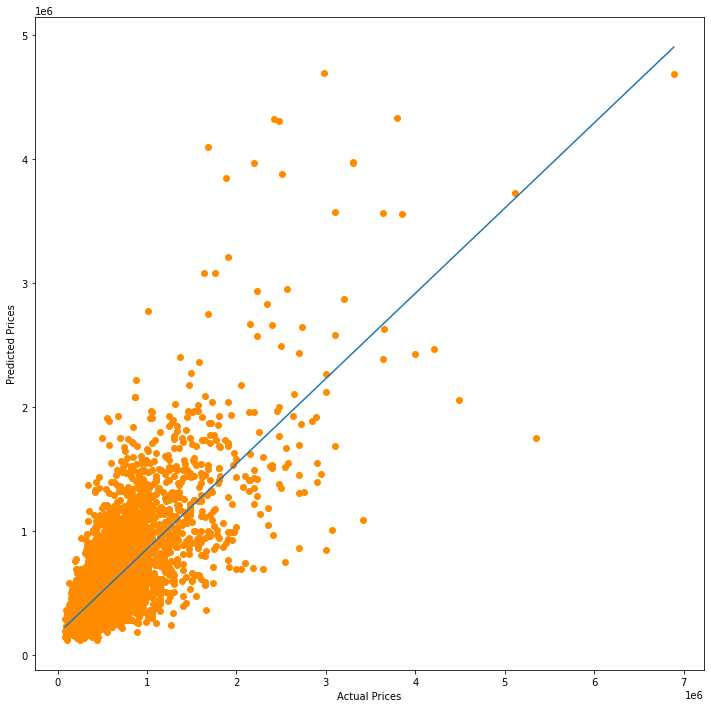

In [446]:
fig, ax = plt.subplots(figsize=(12,12))
plt.scatter(y_test,predictions, color="darkorange")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)))
plt.show();

#### KNN

In [426]:
knn_model = KNeighborsRegressor(n_neighbors= 12) 
knn_model.fit(X_train, y_train) 
knn_model.score(X_test,y_test)
predictions = knn_model.predict(X_test)
print('KNN on Less Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

KNN on Less Data
Accuracy R2:  0.5351507877256547
Mean Absolute Error MAE:  150193.21929621484
Mean Square Error MSE:  63409096895.142105
Root Mean Square Error RMSE:  251811.62978532605


#### Decision Tree

In [427]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
predictions = dtr.predict(X_test)
print('Decision Tree on Less Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Decision Tree on Less Data
Accuracy R2:  0.2726281717595851
Mean Absolute Error MAE:  186417.71396448396
Mean Square Error MSE:  99219251141.75046
Root Mean Square Error RMSE:  314990.87469599885


#### Random Forest

In [428]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)
print('Random Forest on Less Data')
print('Accuracy R2: ', r2_score(y_test,predictions))
print('Mean Absolute Error MAE: ', mean_absolute_error(y_test, predictions))
print('Mean Square Error MSE: ', mean_squared_error(y_test, predictions)) 
print('Root Mean Square Error RMSE: ', sqrt(mean_squared_error(y_test, predictions)))

Random Forest on Less Data
Accuracy R2:  0.5540879543957169
Mean Absolute Error MAE:  155484.1732115757
Mean Square Error MSE:  60825918082.32582
Root Mean Square Error RMSE:  246629.11037086806


Less data (and even 'obvious' data) in our case is not equal to having more accuracy but the other way around. On future iterations we will try to rearrange the data o choose different columns to work with